In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("ev_data.csv")
df.head()


Saving EV_Cost_Prediction_Week1.ipynb to EV_Cost_Prediction_Week1.ipynb


FileNotFoundError: [Errno 2] No such file or directory: 'ev_data.csv'

In [6]:
from google.colab import files
uploaded = files.upload()


Saving EV_Cost_Prediction_Week1.ipynb to EV_Cost_Prediction_Week1 (1).ipynb


In [7]:
import pandas as pd

# Create the EV dataset again
data = {
    'Brand': ['Tata Nexon EV', 'MG ZS EV', 'Hyundai Kona', 'Mahindra XUV400', 'BYD Atto 3'],
    'Range_km': [312, 461, 452, 456, 521],
    'Battery_kWh': [30, 50, 39, 39, 60],
    'Charging_hr': [8, 7, 6, 6, 6],
    'TopSpeed_kmph': [120, 140, 155, 150, 160],
    'Price_Lakhs': [14, 24, 24, 18, 34]
}

df = pd.DataFrame(data)
df.to_csv('ev_data.csv', index=False)   # save dataset
df


,Brand,Range_km,Battery_kWh,Charging_hr,TopSpeed_kmph,Price_Lakhs
0,Tata Nexon EV,312,30,8,120,14
1,MG ZS EV,461,50,7,140,24
2,Hyundai Kona,452,39,6,155,24
3,Mahindra XUV400,456,39,6,150,18
4,BYD Atto 3,521,60,6,160,34


In [8]:
import os
print(os.listdir())


['.config', 'ev_data.csv', 'EV_Cost_Prediction_Week1 (1).ipynb', 'EV_Cost_Prediction_Week1.ipynb', 'sample_data']


In [9]:
df = pd.read_csv('ev_data.csv')
df.head()


,Brand,Range_km,Battery_kWh,Charging_hr,TopSpeed_kmph,Price_Lakhs
0,Tata Nexon EV,312,30,8,120,14
1,MG ZS EV,461,50,7,140,24
2,Hyundai Kona,452,39,6,155,24
3,Mahindra XUV400,456,39,6,150,18
4,BYD Atto 3,521,60,6,160,34


In [11]:
# 📘 EV Cost Prediction - Week 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
df = pd.read_csv('ev_data.csv')

In [13]:
print("Dataset Information:")
print(df.info())
print("\nDataset Summary:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          5 non-null      object
 1   Range_km       5 non-null      int64 
 2   Battery_kWh    5 non-null      int64 
 3   Charging_hr    5 non-null      int64 
 4   TopSpeed_kmph  5 non-null      int64 
 5   Price_Lakhs    5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 372.0+ bytes
None

Dataset Summary:
         Range_km  Battery_kWh  Charging_hr  TopSpeed_kmph  Price_Lakhs
count    5.000000     5.000000     5.000000       5.000000     5.000000
mean   440.400000    43.600000     6.600000     145.000000    22.800000
std     77.112256    11.588788     0.894427      15.811388     7.563068
min    312.000000    30.000000     6.000000     120.000000    14.000000
25%    452.000000    39.000000     6.000000     140.000000    18.000000
50%    456.000000    39.0

In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Brand            0
Range_km         0
Battery_kWh      0
Charging_hr      0
TopSpeed_kmph    0
Price_Lakhs      0
dtype: int64


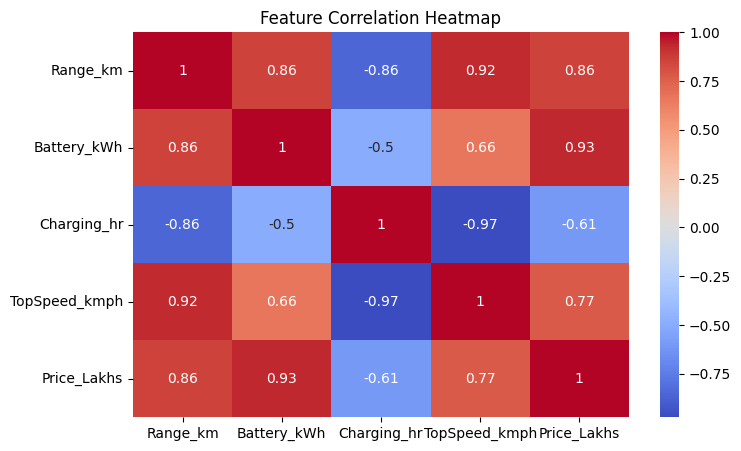

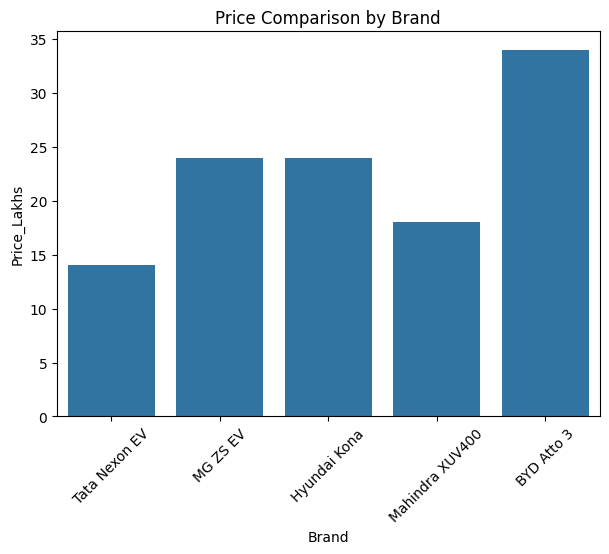

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x='Brand', y='Price_Lakhs', data=df)
plt.title("Price Comparison by Brand")
plt.xticks(rotation=45)
plt.show()

In [20]:
X = df[['Range_km', 'Battery_kWh', 'Charging_hr', 'TopSpeed_kmph']]
y = df['Price_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("\nModel Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Performance:
Mean Absolute Error: 5.717423142877507
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [24]:
new_ev = [[450, 40, 6, 150]]  # Example input
predicted_price = model.predict(new_ev)
print(f"\nPredicted Price for new EV (450km range, 40kWh battery, 6hr charge, 150kmph): ₹{predicted_price[0]:.2f} lakhs")


Predicted Price for new EV (450km range, 40kWh battery, 6hr charge, 150kmph): ₹20.52 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
